In [199]:
import math
import csv
import random 
import matplotlib.pyplot as plt
import numpy as np

def Average(x):
    sum =float(0)
    for i in x:
        sum+=i
    return sum/len(x)

def Distance(x,y):
    return math.sqrt((float(x[0])-float(y[0]))*(float(x[0])-float(y[0])) + (float(x[1])-float(y[1]))*(float(x[1])-float(y[1])))

def FindColMinMax(items): 
    n = len(items[0]); 
    minima = [sys.maxint for i in range(n)]; 
    maxima = [-sys.maxint -1 for i in range(n)]; 
      
    for item in items: 
        for f in range(len(item)): 
            if (item[f] < minima[f]): 
                minima[f] = item[f]; 
              
            if (item[f] > maxima[f]): 
                maxima[f] = item[f]; 
  
    return minima,maxima;
    

In [200]:
def Readfile(file):
    records = []
    x = []
    y = []
    with open(file, newline='\n') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for raw in spamreader:
            records.append(raw)
            x.append(raw[0])
            y.append(raw[1])
    return records,x,y;


In [201]:
data,x,y = Readfile('data.csv')
len(data)
data.remove(['X', 'Y'])
x.remove('X')
y.remove('Y')

for i in range(0,len(data)):
    data[i][0] = float(data[i][0])
    data[i][1] = float(data[i][1])
    

for i in range(0,len(x)):
    x[i] = (float(x[i]))
    y[i] = (float(y[i]))
    
len(data)

650

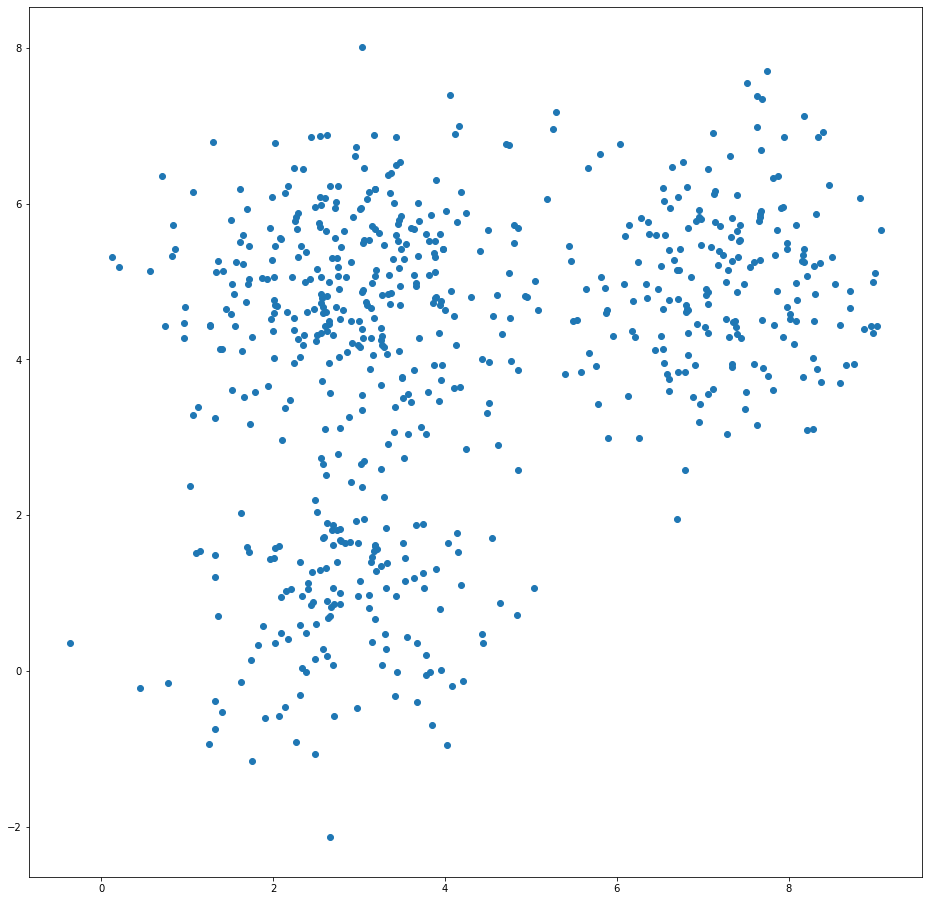

In [202]:
plt.figure(figsize=(16, 16))
plt.plot(x, y, 'o');

In [203]:
k = random.choices(data, weights=None, cum_weights=None, k=3)
iteration = 20
for j in range(0,len(k)):
    k[j].append([])
k

[[3.36409, 6.133455, []], [2.398665, 4.610451, []], [4.297789, 4.804313, []]]

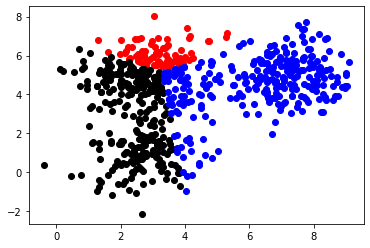

Epoch = 0     Loss Function = 1451.5104740940765


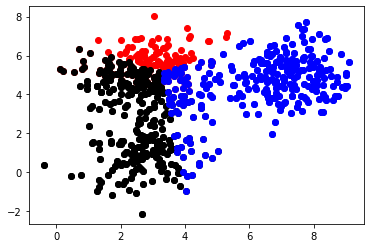

Epoch = 1     Loss Function = 1017.2901393478112


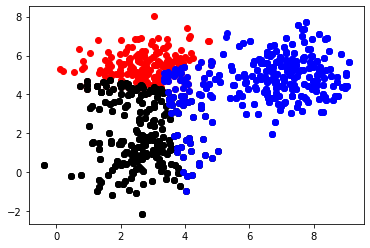

Epoch = 2     Loss Function = 901.8176065167655


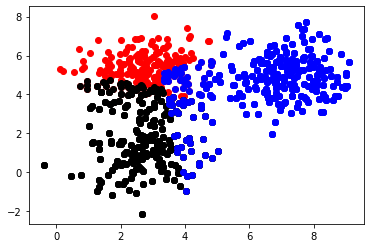

Epoch = 3     Loss Function = 831.459253358786


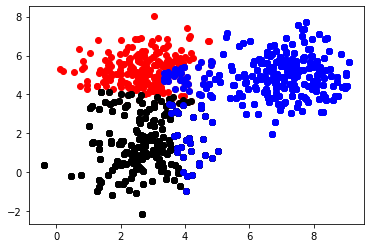

Epoch = 4     Loss Function = 807.4896573053913


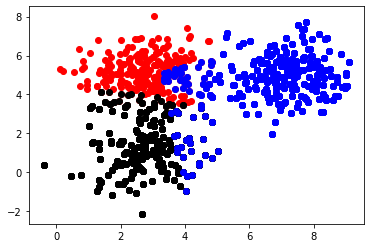

Epoch = 5     Loss Function = 794.317260861723


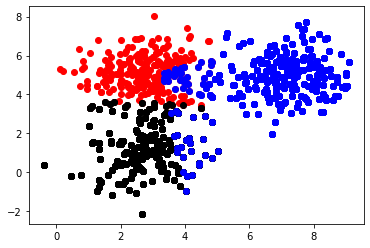

Epoch = 6     Loss Function = 790.5381926959627


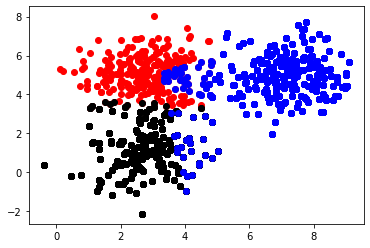

Epoch = 7     Loss Function = 788.6482278786534


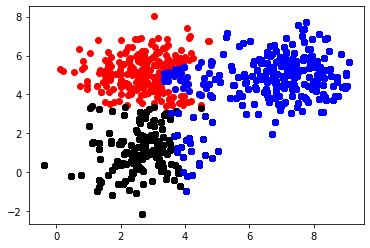

Epoch = 8     Loss Function = 787.6432820807139


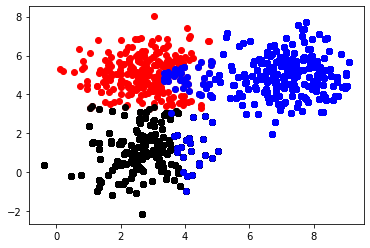

Epoch = 9     Loss Function = 787.0549558985612


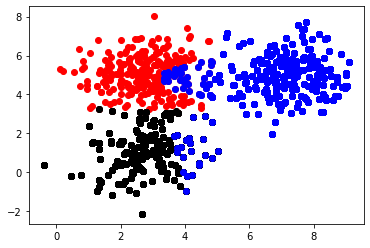

Epoch = 10     Loss Function = 786.7025788691633


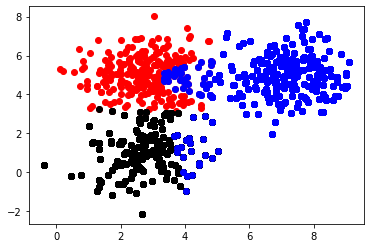

Epoch = 11     Loss Function = 786.5242855830263


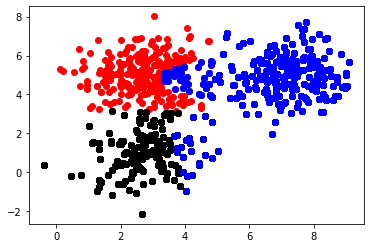

Epoch = 12     Loss Function = 786.422985421485


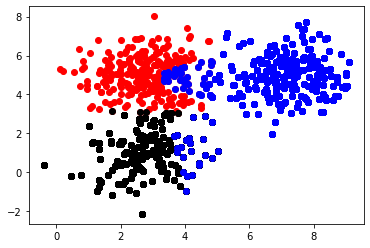

Epoch = 13     Loss Function = 786.353343888829


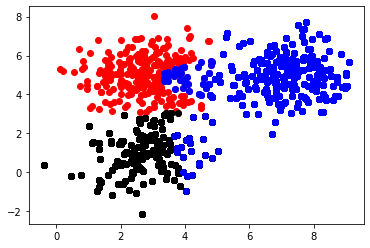

Epoch = 14     Loss Function = 786.3012855414686


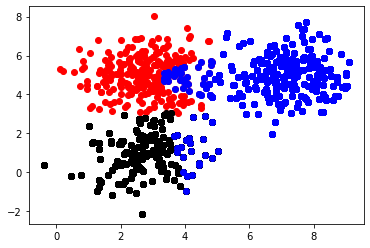

Epoch = 15     Loss Function = 786.2661085315958


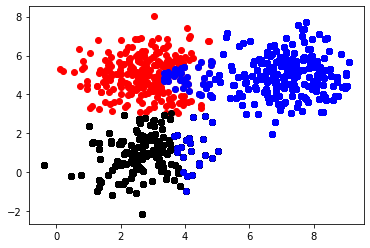

Epoch = 16     Loss Function = 786.2212735216303


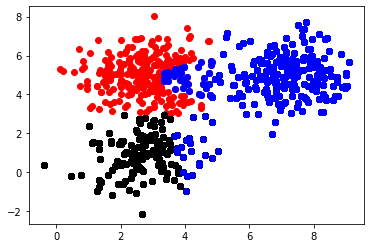

Epoch = 17     Loss Function = 786.1790979784951


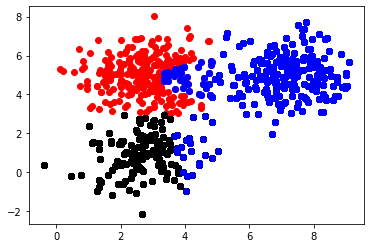

Epoch = 18     Loss Function = 786.1381010527263


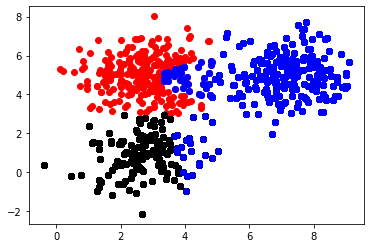

Epoch = 19     Loss Function = 786.0976807428206


In [204]:

for i in range(0,iteration):
    SSE = 0
    for pt in data:
        min = Distance(pt,k[0])
        clust = 0
        for j in range(1,len(k)):
            if Distance(pt,k[j]) < min:
                min = Distance(pt,k[j])
                clust = j
        SSE += min
        try:
            k[0][2].remove(pt)
            k[1][2].remove(pt)
            k[2][2].remove(pt)
        except:
            pass
        k[clust][2].append(pt)
        
        
    
    for j in range(0,len(k)):
        xsum = 0
        ysum = 0
        for t in range(0,len(k[j][2])):
            xsum +=k[j][2][t][0]
            ysum +=k[j][2][t][1]
        k[j][0] = xsum/len(k[j][2])
        k[j][1] = ysum/len(k[j][2])
        
    xpoints = []
    ypoints = []
    for j in range(0,len(k[0][2])):
        xpoints.append(float(k[0][2][j][0]))
        ypoints.append(float(k[0][2][j][1]))

    plt.plot(xpoints, ypoints, 'o', color = 'red')

    xpoints = []
    ypoints = []
    for j in range(0,len(k[1][2])):
        xpoints.append(float(k[1][2][j][0]))
        ypoints.append(float(k[1][2][j][1]))

    plt.plot(xpoints, ypoints, 'o', color = 'black')

    xpoints = []
    ypoints = []
    for j in range(0,len(k[2][2])):
        xpoints.append(float(k[2][2][j][0]))
        ypoints.append(float(k[2][2][j][1]))

    plt.plot(xpoints, ypoints, 'o', color = 'blue')
    
    plt.show()
    print("Epoch = " + str(i) + "     Loss Function = " + str(SSE))
    